### **1. Data Collection**

In [ ]:
#import essential library to load dataset
import pandas as pd
#importing the dataset
train_dataset = pd.read_csv('./dataset/train_salary.csv')
test_dataset = pd.read_csv('./dataset/test_salary.csv')
#Copy of training dataset excluding the last column
train_input = train_dataset.iloc[:, :-1].values
#copy of last column from training dataset
train_output = train_dataset.iloc[:, -1].values
#copy of testing dataset excluding the last column
test_input = test_dataset.iloc[:, :-1].values
#copy of last column from testing dataset
test_output = test_dataset.iloc[:, -1].values

### **2. Model/hypothesis represenation**

In [8]:
def hypothesis(batch_input, parameter):
  pred_output = [ ]
  for i in range(len(batch_input)):#iterate through all the samples in the current batch of inputs
    output_inter = parameter[0] #calculate theta0*x0 (x0 value is 1)
    for n in range(batch_input[0].size): #calculate the number of features
      output_inter += parameter[n+1] * batch_input[i][n] #calculate theta1*x1 + theta2*x2 .. . .thetan*xn
    pred_output.extend([output_inter])
  return pred_output

### **3. Cost function**

In [9]:
def cost(pred_output,batch_output):
  error = (pred_output - batch_output)
  mse_error = (1/2) * (error**2) #calculate error against the number of samples in current batch of inputs
  return error, sum(mse_error)  #error value is for parameter updation and mse_error is to measure the average error at every epoch

### **4. Optimization of model parameters**

In [10]:
def gradient_descent(error,parameters,learning_rate,batch_input):
  parameters[0] = parameters[0] - (learning_rate * (sum(error)/len(batch_input))) #update theta0 against all the input samples
  for n in range(batch_input[0].size):
    interim = 0
    for m in range(len(batch_input)):
      interim += error[m] * batch_input[m][n]
    interim /= len(batch_input)
    parameters[n + 1] = parameters[n + 1] - (learning_rate * interim) #update theta1, theta2, , ,, depending upon the number of features
  return parameters

### **5. Mini batch gradient descent:**

In [11]:
def optimization(training_input,training_output,testing_input,testing_output,batch_size,learning_rate,parameters,epochs):
  steps = len(train_input)/batch_size #calculate the number of steps required in each epoch
  input_batches_data = [ ]
  output_batches_data = [ ]
  best_error = 9999999999999999
  test_error = 0
  for i in range(int(steps)): #create the input and output for each step
    start_point = i*batch_size
    end_point = ((i+1)*(batch_size))
    input_batches_data.append(train_input[start_point:end_point])
    output_batches_data.append(train_output[start_point:end_point])
  if len(training_input)%batch_size:
    start_point = (int(steps))*(batch_size)
    input_batches_data.append(train_input[start_point:])
    output_batches_data.append(train_output[start_point:])
    steps = int(steps) + 1
  steps = int(steps)
  for epoch in range(epochs):
    total_error = 0
    for step in range(steps):
      pred_output = hypothesis(input_batches_data[step],parameters) #calculate output with present value of parameters
      error,mse_error = cost(pred_output,output_batches_data[step]) #calculate error between predicted output and actual output
      parameters = gradient_descent(error,parameters,learning_rate,input_batches_data[step]) #use the error to update the model parameters
      total_error += mse_error
    total_error = total_error/len(training_input)
    train_error_list.append(total_error) #append the mse_error for graph plot
    test_error = test_model(test_input,test_output,parameters) #calculate test error
    test_error_list.append(test_error) #append the test error for graph plot
    if ((epoch+1)%2000==0):#print training progress after every 2000 epochs and replace 2000 by 1 to print progress after every epoch
      print("Epoch:",epoch+1, "Training error:",total_error,"Testing error:",test_error, "Parameters:",parameters)
    if(best_error > test_error and test_error>=0.0): # copy the best values during the training from epoch 1 till last epoch
      best_error=test_error
      best_epoch=epoch+1
      best_parameters=parameters
  return best_error,best_epoch,best_parameters

### **6. Model testing**

In [12]:
def test_model(testing_input,testing_output,parameters):
  total_error = 0
  predicted_output = hypothesis(testing_input,parameters)#calculate the per sample predicted output
  error,mse_error = cost(predicted_output,testing_output)#calculate error for each testing sample
  total_error = (mse_error) / len(testing_input)
  return total_error

### **7. Model training**

In [13]:
epochs = 25000
learning_rate = 0.0005
parameters = [0.0 for i in range(len(train_input[0])+1)]
train_error_list = [ ]
test_error_list = [ ]
batch_size = 10
if batch_size<=len(train_input):
  best_error,best_epoch,best_parameters = optimization(train_input,train_output,test_input,test_output,batch_size,learning_rate,parameters,epochs)
  print("\n\n\n-----------------------------------------------------Training Finished-----------------------------------------------------\n")
  print("The Best testing error:",best_error,"is at epoch:", best_epoch,"with parameters values",best_parameters)
  print("\n---------------------------------------------------------------------------------------------------------------------------")
else:
  print("Batch size is greater than the input size")

Epoch: 2000 Training error: 0.7040898427204569 Testing error: 1.3447045816520464 Parameters: [0.9284296654923968, 9.456163219387943, 6.021824708004713, 8.337882647479603]
Epoch: 4000 Training error: 0.6812182443313816 Testing error: 1.3106175843240728 Parameters: [0.6347282753942884, 9.458742335844848, 6.06111696179911, 8.366234508547919]
Epoch: 6000 Training error: 0.6677395825751841 Testing error: 1.2863664712017353 Parameters: [0.4057961265840483, 9.465664236728447, 6.063162865309683, 8.392757122419733]
Epoch: 8000 Training error: 0.6595076758956008 Testing error: 1.2684685392419126 Parameters: [0.2270030796519673, 9.471131902946308, 6.0644013467175135, 8.413526551061588]
Epoch: 10000 Training error: 0.6544785243364034 Testing error: 1.2551230200839079 Parameters: [0.08736366330373692, 9.47540298772195, 6.065364105748205, 8.429748410396606]
Epoch: 12000 Training error: 0.6514047105119127 Testing error: 1.245086065607222 Parameters: [-0.02169637405904135, 9.478738765220184, 6.0661159

### **8. Graph plots to visualize the training and testing errors**

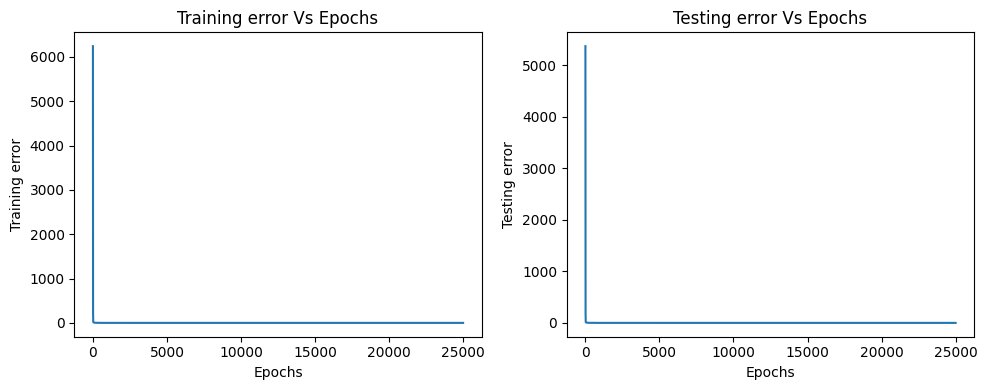

In [14]:
#import the library to plot the graph
import matplotlib.pyplot as plt
#copy the data for plotting
epochs_num = list(range(1, epochs+1))
x = epochs_num
y1 = train_error_list
y2 = test_error_list
#create a figure with subplots and specify figsize
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
#plot the first subplot for training and add legend and axis labels
axes[0].plot(x, y1)
axes[0].set_title('Training error Vs Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Training error')
#plot the second subplot for testing and add legend and axis labels
axes[1].plot(x, y2)
axes[1].set_title('Testing error Vs Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Testing error')
plt.tight_layout()
#show the plots
plt.show()